In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
from sklearn.model_selection import train_test_split

In [19]:
df_train = pd.read_csv("train.csv")

In [20]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [21]:
features_columns = list(df_train.columns)
features_columns.remove('price_range')
target = ['price_range']

In [25]:
X_train = df_train[features_columns]
Y_train = list(df_train[target].price_range)

In [26]:
X_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

In [28]:
k_features = 5

# Create a SelectKBest object with the desired statistical test (e.g., f_classif for classification)
selector = SelectKBest(score_func=f_classif, k=k_features)

# Fit the selector to your data and transform it
X_new = selector.fit_transform(X_train, Y_train)

In [29]:
selected_features_df = pd.DataFrame(X_new, columns=X_train.columns[selector.get_support()])

In [30]:
selected_features_df.columns

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X_new, Y_train, test_size=0.2 , random_state=42)

In [32]:
model_lr = LogisticRegression(max_iter=1000)


In [33]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [34]:
testing_acc_lr= model_lr.score(X_test , y_test)
print(f"Testing accuracy: {testing_acc_lr}")

Testing accuracy: 0.98


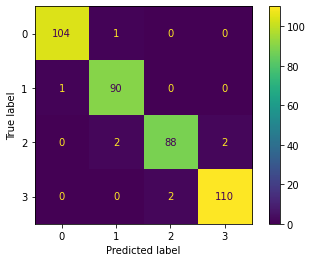

In [35]:
ConfusionMatrixDisplay.from_estimator(
    model_lr,
    X_test,
    y_test
);

In [36]:
model_svc= SVC()
model_svc.fit(X_train, y_train)


SVC()

In [37]:
testing_acc_svc= model_svc.score(X_test , y_test)
print(f"Testing accuracy: {testing_acc_svc}")

Testing accuracy: 0.965


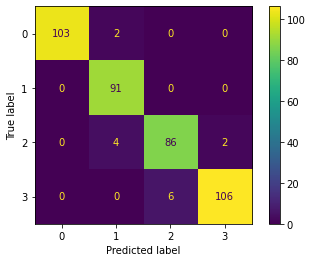

In [47]:
ConfusionMatrixDisplay.from_estimator(
    model_svc,
    X_test,
    y_test
);

In [38]:
features = selected_features_df.columns

In [39]:
features

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')

In [41]:
probabilities = model_lr.predict_proba([[ 842,  188,   20,  756, 2549]])[0]
    
probabilities_percentage = [(float(prob)) for prob in probabilities]
class_probabilities = {str(i): prob for i, prob in enumerate(probabilities_percentage)}
class_probabilities

{'0': 3.076725664735046e-19,
 '1': 0.9999738685974214,
 '2': 2.613140257865301e-05,
 '3': 2.7410030771973725e-40}

In [234]:
import gradio as gr

In [341]:
import gradio as gr


def classifier(battery_power, mobile_wt, px_height, px_width, ram):
    probabilities = model_lr.predict_proba([[battery_power, mobile_wt, px_height, px_width, ram]])[0]
    
    probabilities_percentage = [(float(prob)) for prob in probabilities]

    class_probabilities = {str(i): prob for i, prob in enumerate(probabilities_percentage)}

    return class_probabilities

inputs = [
    gr.Number(value=842),
    gr.Number(value=188),
    gr.Number(value=20),
    gr.Number(value=756),
    gr.Number(value=2549),
]
outputs =  gr.Label()

title = "Mobile Price Classification"
description = "Enter the details to correctly classify the price range?"

demo = gr.Interface(
    fn=classifier,
    inputs=inputs,
    outputs=gr.outputs.Label(num_top_classes=4),
    title=title,
    description=description,
)

demo.launch()

/usr/local/lib/python3.9/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.9.1, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7918

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x13b586eb0>, 'http://127.0.0.1:7918/', None)

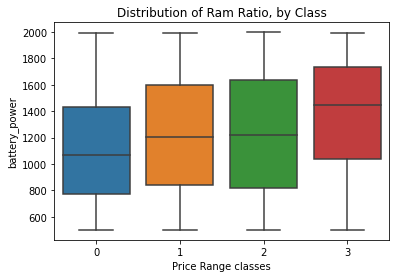

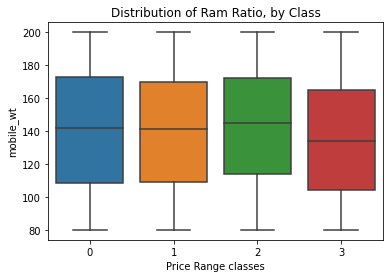

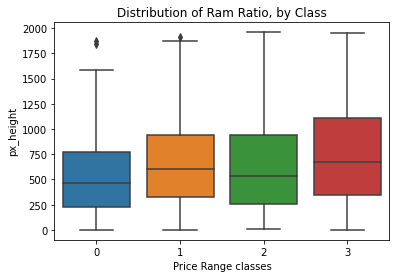

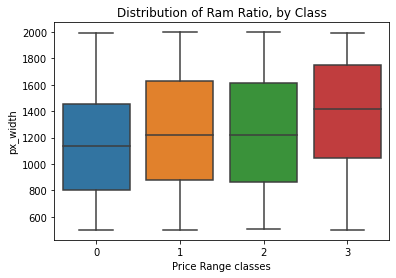

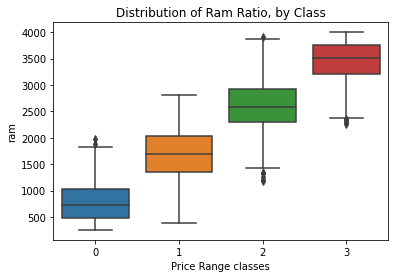

In [347]:
features = ['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']
for f in features:
    sns.boxplot(x='price_range' , y=f , data=df_train)
    plt.xlabel("Price Range classes")
    plt.ylabel(f)
    plt.title("Distribution of Ram Ratio, by Class")
    plt.show()

In [348]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

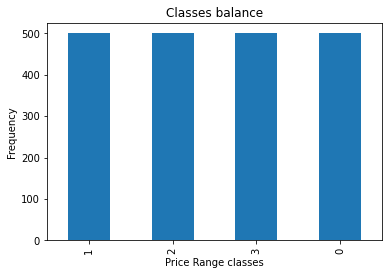

In [349]:
df_train['price_range'].value_counts(normalize= False).plot(kind = 'bar')
plt.xlabel("Price Range classes")
plt.ylabel("Frequency")
plt.title("Classes balance");

<AxesSubplot:>

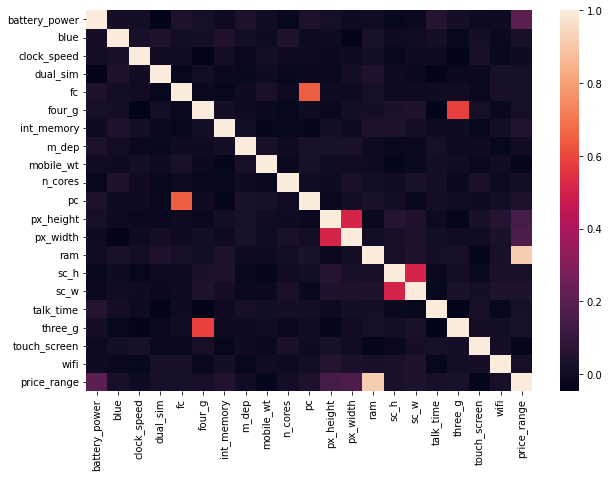

In [46]:
corr = df_train.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr)

In [353]:
import joblib
filename = 'logistic_model.sav'
joblib.dump(model_lr, filename)

['logistic_model.sav']